# Comparison of two multinomial observations

_We have that pre-debate voters in the US where as follows:_

* Total number of people asked: 639
* Bush: 294
* Dukakis: 307
* No opinion/other: 38

_After the debate, they asked 639 new people what they where going to vote and got the follwoing result:_

* Total number of people asked: 639
* Bush: 288
* Dukakis: 332
* No opinion/other: 19

_we also assume that the surveys are iid's._

_First, mode lthe data with two different multinomial distributions_

Pre debate:

$$(\theta_1, \theta_2, \theta_3)|data \sim Dir(294, 307, 38)$$

After debate:


$$(\theta_1^*, \theta_2^*, \theta_3^*)|data \sim Dir(288, 332, 19)$$

_For j=1,2 , let $\alpha_j$ be the propotion of voters who prefferred Bush, out of these who had a preference for either Bush or Dukakis at the time of survey j._

$$\alpha_1 = \frac{\theta_1}{\theta_1 + \theta_2} \qquad \alpha_2 = \frac{\theta_1^*}{\theta_1^* + \theta_2^*}$$

_Plot a histrogram of the posterior density for $\alpha_2 - \alpha_1$. What is $P(\alpha2 > \alpha_1)$?_

Can be solved in multiple ways. The first way is to use the dirichlet distribution:

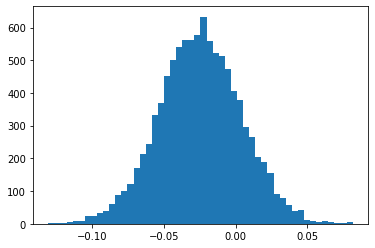

In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

pre_debate = np.array([294,307, 38])
post_debate = np.array([288, 332, 19])

dist_pre = stats.dirichlet.rvs(pre_debate, size=10**4)
dist_post = stats.dirichlet.rvs(post_debate, size=10**4)

alpha_1 = dist_pre[:,0]/(dist_pre[:,0] + dist_pre[:,1])
alpha_2 = dist_post[:,0]/(dist_post[:,0] + dist_post[:,1])
dist_diff1 = alpha_2 - alpha_1 

plt.hist(dist_diff1, bins=50)
plt.show()

Another approach is to use two betas (since we now have a binary problem):

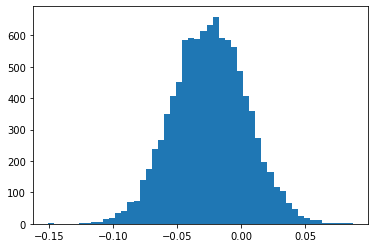

In [5]:
alpha1 = stats.beta.rvs(pre_debate[0], pre_debate[1], size=10**4)
alpha2 = stats.beta.rvs(post_debate[0], post_debate[1], size=10**4)

dist_diff2 = alpha2 - alpha1
plt.hist(dist_diff2, bins=50)
plt.show()

A third way is to use Gamma distributions (which is discussed more in depth in Nils Collection ex. 13). I will not use this approach now, but good too know that there are multiple ways to reach the same goal.

As we can see, the plots are approximately the same, indicating that both approaches is equaly good.

Now lets calculate $P(\alpha_2>\alpha_1)$, which can be re-written as $P(\alpha_2-\alpha_1 >0)$:

In [6]:
# first method (i) and using normal approximation
print(f"First method:\np(a_post>a_pre): {stats.norm.sf(0, np.mean(dist_diff1), np.std(dist_diff1))}")
# second method (ii) and using normal approximation
print(f"Second method:\np(a_post>a_pre): {stats.norm.sf(0, np.mean(dist_diff2), np.std(dist_diff2))}")

First method:
p(a_post>a_pre): 0.19439395924529218
Second method:
p(a_post>a_pre): 0.19420402575715223


We get approximately the same results, which is good :-). We get that there are a 19% probability that the people have switched over to Bush. But, we can not assume that our post debate model is different than our pre debate model based on these numbers. 